# **Business insights from Zomato Data Set**

![](http://static.businessworld.in/article/article_extra_large_image/1495095537_qc3HQN_zomato.jpg)

# Introduction
Zomato is a company that provides online order, food delivery and online restaurant booking facility. It has been collecting huge data of restaurants from different locations. Business managers of the company want our data analysts team to analyze it’s huge data. They want us to find insights that can help their company grow.  


# Business problem 
Zomato wants to tie up with more restaurants. So they want to know in which locations they should start providing their services and which type of restaurants they should start approaching . They also want to know, how they can use the data to convince shopkeepers into accepting their services.
​
Zomato’s new business client want to set up a restaurant, so they want to know in which location what category of restaurant they should set up and also which cuisines at what price they should sell to get good amount of customers in future once the restaurant is set. Moreover, they want to know how zomato ‘s services can help them in growing their business  quickly.
​

# Assumptions 
* The information is still current and can be used to derive insights, which zomato’s business team can further use to make strategic plans.
* No outliers has a substantial impact on the data being used.
* The conclusions and recommendations based on insights derived from data will be accepted without any questions or objection.
* The company isn’t currently using any of the suggested solutions in the report.


# Research/Guiding questions
1. What is the number of restaurants in each location?
2. How many restaurants have book table facility and how many don't? 
3. How many restaurants have online order facility and how many don't?
4. How much is the average rating restaurants with book table facility got?
5. How much is the average rating restaurants with online order facility got?
6. How many restaurants in different locations provide book table facility and how many don't?
7. How many restaurants in different locations provide online order facility and how many don't?
8.  How many different categories of restaurants are present in different locations ?
9. In which locations people prefer to give feedback/vote and is it dependent on the number of restaurants?
10. Which restaurant categories has got comparatively higher ratings and what could be the common responsible factor behind it ?
11. which category of restaurants are comparatively more expensive or cheaper?
12. average cost of cuisines in different locations and which locations don’t have restaurants providing  a certain combination of cuisines?
13.  which cuisines have the most positive ratings?

# Hypothesis
* Restaurants that have online order and table booking facility perform better.
* Restaurants where people can enjoy more by engaging in different social activities are rated more positively.
* Every location has different number of restaurants of different categories.
* Not every type of cuisine is sold in a particular location. There could be some similar cuisines being sold in different locations and some different cuisines.


## PREPARING DATA

## Importing Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('dark_background')

## Reading CSV

In [2]:
df = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Checking the size of file

In [3]:
os.path.getsize('../input/zomato-bangalore-restaurants/zomato.csv')

574072999

## Number of rows and columns present

In [4]:
df.shape

(51717, 17)

## List of column names

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# CLEANING DATA

## Removing columns that we don't need for our analysis

In [6]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list', 'rest_type','listed_in(city)'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


## Dropping Duplicates

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(34987, 9)

## Checking unique values in rate column

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Replacing incorrect datapoints and splitting values 

In [10]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## Filling Null Values in Rate Column with Mean

In [11]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

## Checking nulls in dataframe

In [12]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

## Dropping Null Values

In [13]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


## Renaming columns

In [14]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Category', 'rate':'Ratings'}, inplace = True)
df.head()

,name,online_order,book_table,Ratings,votes,location,cuisines,Cost2plates,Category
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


## Capitalizing column names

In [15]:
df.columns=df.columns.str.upper()
df.head(5)

,NAME,ONLINE_ORDER,BOOK_TABLE,RATINGS,VOTES,LOCATION,CUISINES,COST2PLATES,CATEGORY
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


## Checking unique values 

In [16]:
df['COST2PLATES'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## Removing ',' from Cost2Plates Column

In [17]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['COST2PLATES'] = df['COST2PLATES'].apply(handlecomma)
df['COST2PLATES'].unique()
        

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [18]:
df.head()

,NAME,ONLINE_ORDER,BOOK_TABLE,RATINGS,VOTES,LOCATION,CUISINES,COST2PLATES,CATEGORY
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600.0,Buffet


## Cleaning Location Column

In [19]:
location = df['LOCATION'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['LOCATION'] = df['LOCATION'].apply(handle_location)
df['LOCATION'].value_counts()

others                   4851
BTM                      2499
Whitefield               1958
HSR                      1760
Indiranagar              1748
Marathahalli             1665
Koramangala 5th Block    1605
JP Nagar                 1405
Jayanagar                1243
Electronic City          1220
Bellandur                1134
Bannerghatta Road        1054
Sarjapur Road             938
Brigade Road              684
Koramangala 7th Block     623
Brookefield               598
Koramangala 6th Block     595
Kalyan Nagar              589
Koramangala 4th Block     587
New BEL Road              584
Banashankari              570
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     538
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 432
Residency Road            423
Kammanahalli              420
Old Airport Road          405
Lavelle Ro

## Cleaning Cuisines Column

In [20]:
cuisines = df['CUISINES'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['CUISINES'] = df['CUISINES'].apply(handle_cuisines)
df['CUISINES'].value_counts()


others                                              19682
North Indian                                         1907
North Indian, Chinese                                1570
South Indian                                         1171
Bakery, Desserts                                      593
Biryani                                               560
Fast Food                                             485
South Indian, North Indian, Chinese                   475
Desserts                                              447
Cafe                                                  447
Bakery                                                387
Chinese                                               338
Ice Cream, Desserts                                   304
Mithai, Street Food                                   260
Chinese, North Indian                                 253
North Indian, Chinese, Biryani                        238
North Indian, South Indian                            230
Desserts, Ice 

In [21]:
df.head()

,NAME,ONLINE_ORDER,BOOK_TABLE,RATINGS,VOTES,LOCATION,CUISINES,COST2PLATES,CATEGORY
0,Jalsa,Yes,Yes,4.1,775,Banashankari,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,others,600.0,Buffet


## Checking categories of different restaurants 

In [22]:
df.CATEGORY.value_counts()

Delivery              16055
Dine-out              12834
Desserts               2457
Cafes                  1238
Drinks & nightlife      902
Buffet                  669
Pubs and bars           597
Name: CATEGORY, dtype: int64

# Data analysis and visualization

## Amount of restaurants in various locations

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


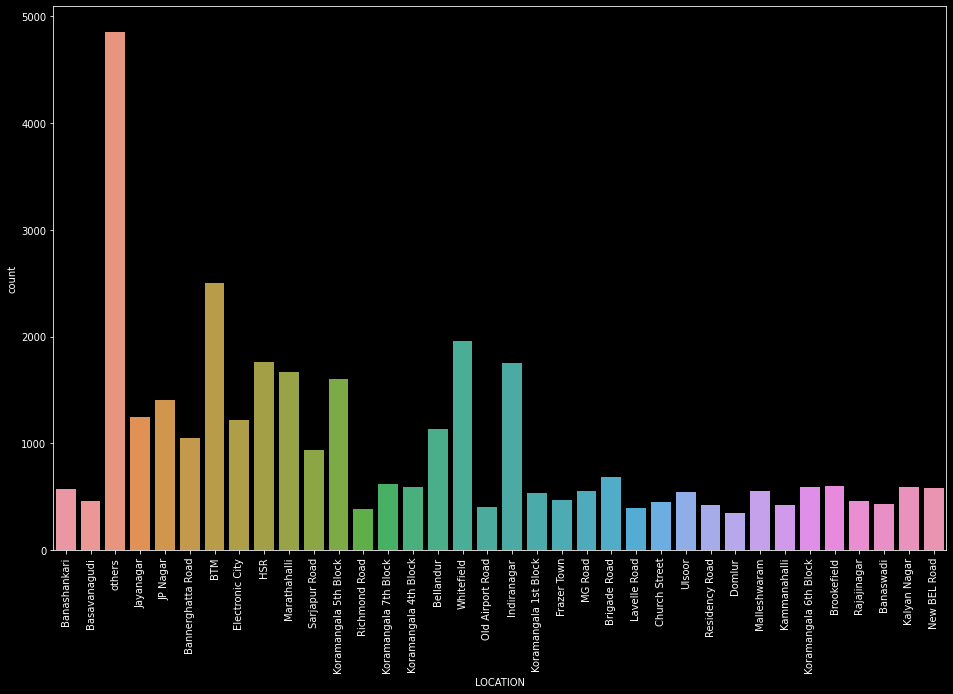

In [23]:
plt.figure(figsize = (16,10))
sns.countplot(df.LOCATION)
plt.xticks(rotation=90)
warnings.simplefilter(action='ignore', category=FutureWarning);

We can see how the total number of restaurants  present in different locations. Here, it’s clear that BTM has the largest number of restaurants, while Domlur has the least number of restaurants present

## Amount of restaurants that support online order facility

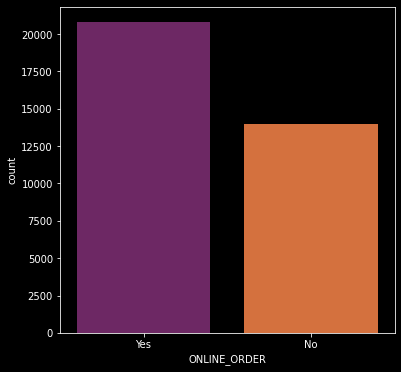

In [24]:
plt.figure(figsize = (6,6))
sns.countplot(df['ONLINE_ORDER'], palette = 'inferno')
warnings.simplefilter(action='ignore', category=FutureWarning);

This above chart tells us that there are above 20000 restaurants which provide online order facility and a little more than 12500 restaurants which still don’t have online order  facility.

## Amount of restarants that support Book Table facility

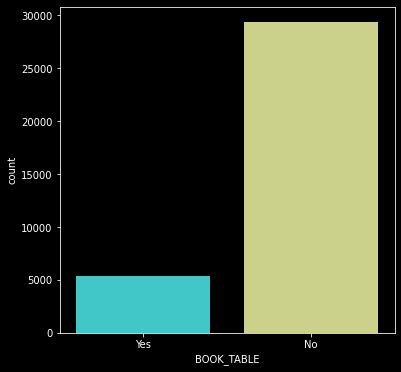

In [25]:
plt.figure(figsize = (6,6))
sns.countplot(df['BOOK_TABLE'], palette = 'rainbow')
warnings.simplefilter(action='ignore', category=FutureWarning);

The book table facility is provided by very few restaurants , that is only about 5000 Restaurants are providing book  table facility, while nearly 30000 Restaurants don’t have book table facility.

## Corelation of online order facility and restaurant ratings

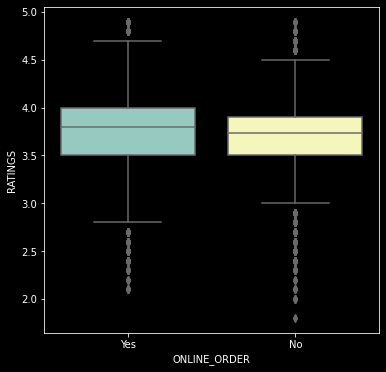

In [26]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'ONLINE_ORDER', y = 'RATINGS', data = df);

Generally, ratings of restaurants with online order facility range from 2.8-4.7, with average rating  being around 3.7 and ratings of  restaurants which don’t have  online order facility range from 3-4.5, with average  rating  being  around 3.6

## Corelation of Book Table facility with Restaurant Ratings

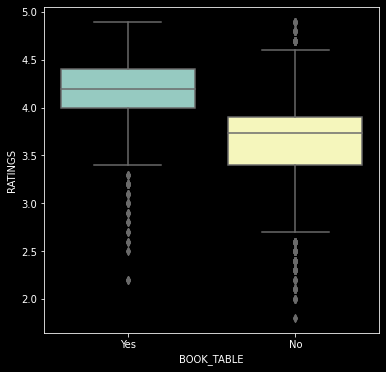

In [27]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'BOOK_TABLE', y = 'RATINGS', data = df);

Generally, ratings of restaurants with Book Table facility range from 3.4-4.9 and average rating  is around 4.2 . While, ratings of  restaurants which don’t have  Book Table  facility range from 2.7-4.6 and average  rating  is  around 3.75

## Restaurant ratings for different Cuisines

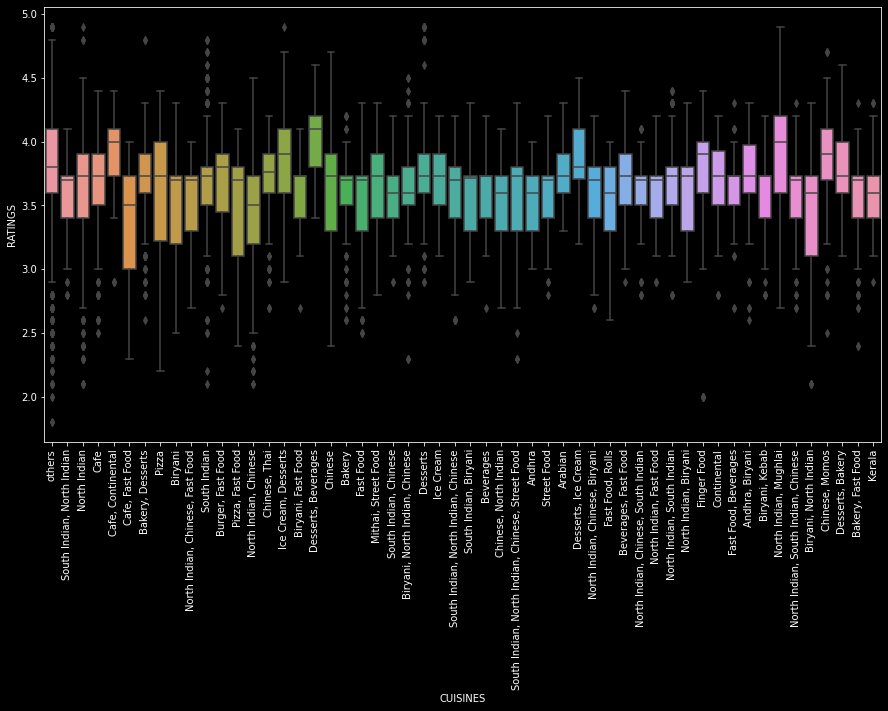

In [28]:
plt.figure(figsize= (15,8))
sns.boxplot(x='CUISINES', y='RATINGS', data=df)
plt.xticks(rotation=90);

We can see that there’s difference in the ratings of various  cuisines and also, the variation of ratings for each cuisines is huge. The cuisine with the highest average rating is Desert, beverages (4.2) and the cuisine with the lowest average rating is Café, fast food (3.4)

## Count of feedback(Votes) provided by people in different locations

In [29]:
df4 = df[['LOCATION', 'VOTES']]
df4.drop_duplicates()
df5 = df4.groupby(['LOCATION'])['VOTES'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('VOTES', ascending=False)
df5.head(5)

,VOTES
LOCATION,
Koramangala 5th Block,1984132
Indiranagar,1130077
others,1017864
Koramangala 4th Block,591240
Church Street,555228


## Plotting Location vs Feedback provided

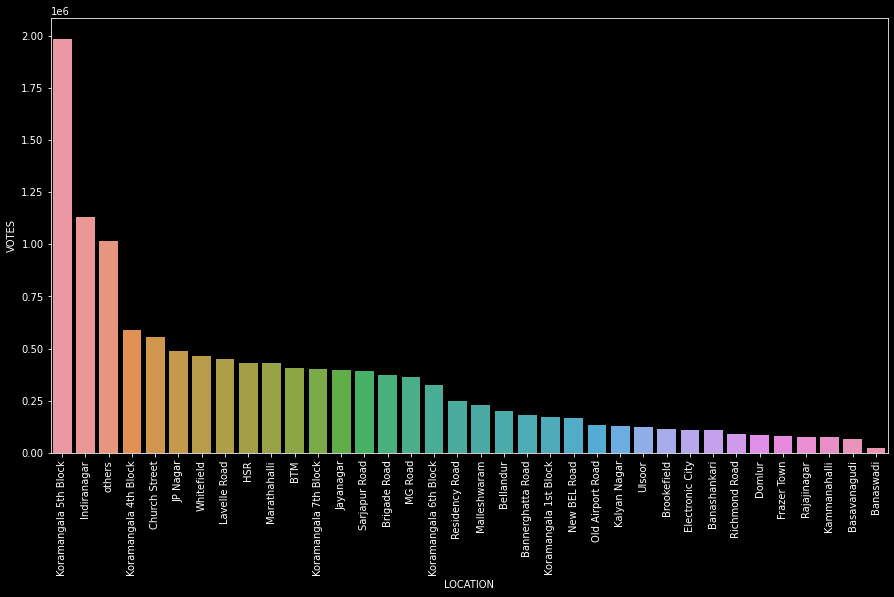

In [30]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index , df5['VOTES'])
plt.xticks(rotation = 90)
warnings.simplefilter(action='ignore', category=FutureWarning);

The above chart shows the total amount of votes/feedback people residing in various locations chose to give. Surprisingly, the locations that have the highest number of restaurants (eg. BTM) haven’t gotten the largest number of votes/feedback from people of its location. This clearly shows that people from some location are more willing to give feedback compared to other locations. This also states that, some locations have better feedback system in place than others.

## Availability of online order facilities provided by restaurants in different locations 

In [31]:
df1 = df.groupby(['LOCATION','ONLINE_ORDER'])['NAME'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['LOCATION'], columns=['ONLINE_ORDER'], fill_value=0, aggfunc=np.sum)
df1

NAME      
ONLINE_ORDER             No   Yes
LOCATION                         
BTM                     802  1697
Banashankari            260   310
Banaswadi               213   219
Bannerghatta Road       403   651
Basavanagudi            182   281
Bellandur               443   691
Brigade Road            292   392
Brookefield             206   392
Church Street           182   264
Domlur                  187   158
Electronic City         661   559
Frazer Town             206   263
HSR                     441  1319
Indiranagar             648  1100
JP Nagar                561   844
Jayanagar               381   862
Kalyan Nagar            241   348
Kammanahalli            176   244
Koramangala 1st Block   148   390
Koramangala 4th Block   279   308
Koramangala 5th Block   580  1025
Koramangala 6th Block   211   384
Koramangala 7th Block   189   434
Lavelle Road            237   159
MG Road                 297   257
Malleshwaram            224   332
Marathahalli            642  1023
New BEL Road            250   334
Old Airport Road        205   200
Rajajinagar             214   248
Residency Road          276   147
Richmond Road           249   138
Sarjapur Road           283   655
Ulsoor                  201   345
Whitefield              884  1074
others                 2109  2742

## Plotting online order facility location wise

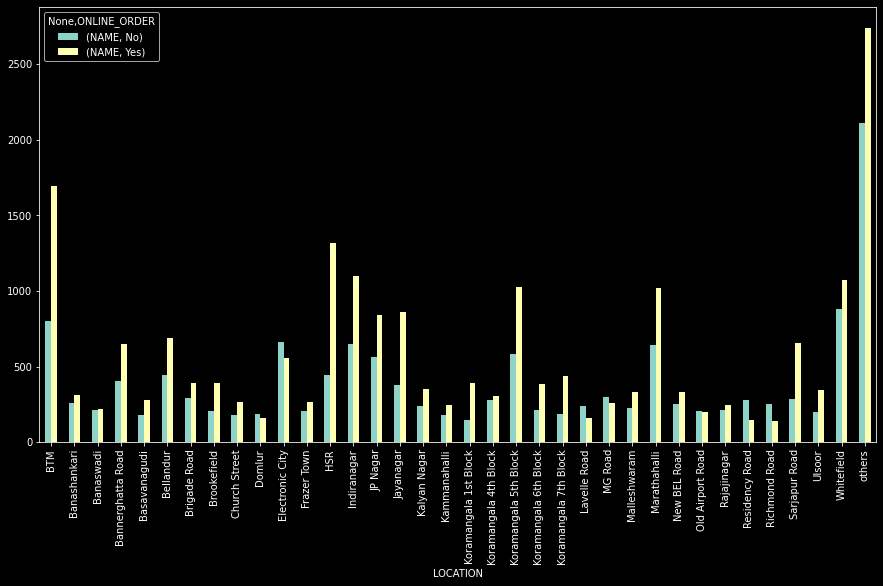

In [32]:
df1.plot(kind = 'bar', figsize = (15,8));

The location BTM has the largest number of restaurants who provide online order facilities(around 1700). It can be also seen that there are many restaurants from different locations who do not provide online order facility. Generally, in most locations the restaurants who provide online order facility are more than the restaurants who don’t provide online order facility . But, in few locations the restaurants who don’t provide online order facility are more than the restaurants 

## Availability of Book Table facilities provided by restaurants in different locations 

In [33]:
df2 = df.groupby(['LOCATION','BOOK_TABLE'])['NAME'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['LOCATION'], columns=['BOOK_TABLE'], fill_value=0, aggfunc=np.sum)
df2

NAME     
BOOK_TABLE               No  Yes
LOCATION                        
BTM                    2373  126
Banashankari            527   43
Banaswadi               426    6
Bannerghatta Road       975   79
Basavanagudi            451   12
Bellandur              1038   96
Brigade Road            539  145
Brookefield             525   73
Church Street           279  167
Domlur                  300   45
Electronic City        1124   96
Frazer Town             461    8
HSR                    1573  187
Indiranagar            1311  437
JP Nagar               1153  252
Jayanagar              1016  227
Kalyan Nagar            471  118
Kammanahalli            386   34
Koramangala 1st Block   496   42
Koramangala 4th Block   340  247
Koramangala 5th Block  1004  601
Koramangala 6th Block   514   81
Koramangala 7th Block   493  130
Lavelle Road            195  201
MG Road                 286  268
Malleshwaram            475   81
Marathahalli           1508  157
New BEL Road            529   55
Old Airport Road        347   58
Rajajinagar             422   40
Residency Road          306  117
Richmond Road           306   81
Sarjapur Road           791  147
Ulsoor                  433  113
Whitefield             1706  252
others                 4272  579

## Plotting Book Table facility location wise

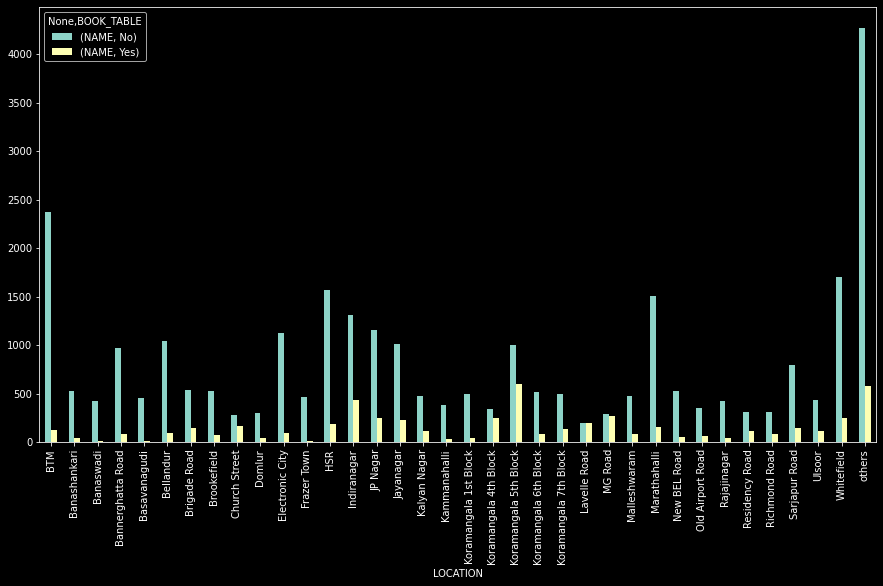

In [34]:
df2.plot(kind = 'bar', figsize = (15,8));

It’s shocking that almost all locations have huge number of restaurants who don’t provide book  table facility as compared to those restaurants who provide book table facility and as BTM location has the highest number of restaurants, the number of restaurants who don’t provide book table facility is also the highest.

## Average cost of different cuisines location wise

In [35]:
df3= df.groupby(['LOCATION','CUISINES'])['COST2PLATES'].mean()
df3.to_csv('location_cuisine.csv')
df3 = pd.read_csv('location_cuisine.csv')
df3=pd.crosstab(df3.LOCATION,df3.CUISINES, values=df.COST2PLATES, aggfunc=np.average)
df3

CUISINES,Andhra,"Andhra, Biryani",Arabian,Bakery,"Bakery, Desserts","Bakery, Fast Food",Beverages,"Beverages, Fast Food",Biryani,"Biryani, Fast Food",...,Pizza,"Pizza, Fast Food",South Indian,"South Indian, Biryani","South Indian, Chinese","South Indian, North Indian","South Indian, North Indian, Chinese","South Indian, North Indian, Chinese, Street Food",Street Food,others
LOCATION,,,,,,,,,,,,,,,,,,,,,
BTM,800.0,800.0,800.0,300.0,600.0,600.0,800.0,600.0,700.0,550.0,...,300.0,500.0,800.0,600.0,400.0,300.0,450.0,850.0,300.0,450.0
Banashankari,150.0,400.0,750.0,450.0,450.0,NaN,300.0,NaN,800.0,200.0,...,400.0,200.0,700.0,100.0,300.0,600.0,200.0,500.0,250.0,500.0
Banaswadi,400.0,NaN,200.0,300.0,600.0,800.0,250.0,NaN,950.0,300.0,...,400.0,350.0,100.0,150.0,150.0,200.0,100.0,400.0,200.0,150.0
Bannerghatta Road,400.0,150.0,250.0,250.0,150.0,200.0,350.0,300.0,100.0,150.0,...,200.0,250.0,700.0,650.0,300.0,700.0,500.0,350.0,150.0,400.0
Basavanagudi,NaN,NaN,NaN,100.0,200.0,NaN,150.0,300.0,350.0,100.0,...,500.0,300.0,1300.0,350.0,500.0,NaN,700.0,1000.0,400.0,750.0
Bellandur,500.0,400.0,250.0,200.0,600.0,650.0,NaN,550.0,450.0,300.0,...,500.0,350.0,200.0,250.0,600.0,200.0,250.0,150.0,600.0,300.0
Brigade Road,NaN,NaN,NaN,250.0,NaN,550.0,NaN,300.0,NaN,NaN,...,NaN,300.0,500.0,100.0,400.0,900.0,200.0,NaN,NaN,550.0
Brookefield,NaN,NaN,800.0,200.0,250.0,NaN,150.0,1200.0,400.0,NaN,...,NaN,250.0,150.0,600.0,NaN,200.0,200.0,NaN,650.0,100.0
Church Street,100.0,NaN,NaN,NaN,NaN,NaN,NaN,600.0,NaN,NaN,...,NaN,400.0,600.0,NaN,NaN,NaN,NaN,250.0,NaN,400.0


## Heatmap of average cost of different cuisines location wise

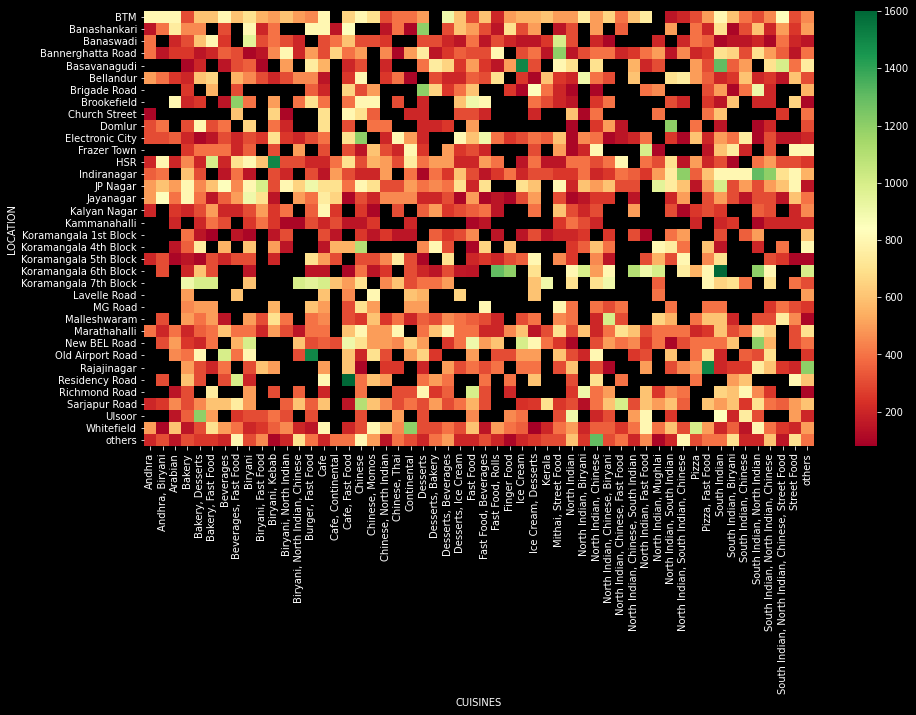

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df3,cmap='RdYlGn', annot=False);

The above heatmap represents variation of average cost of different cuisines across different locations. The dark pixels state that a particular cuisine is not sold in that corresponding  location by any restaurant as shown in the heatmap. Moreover, it’s pretty obvious that across all locations most cuisines are priced below 1000.

## Variation of cost of restaurant plates with restaurant category 

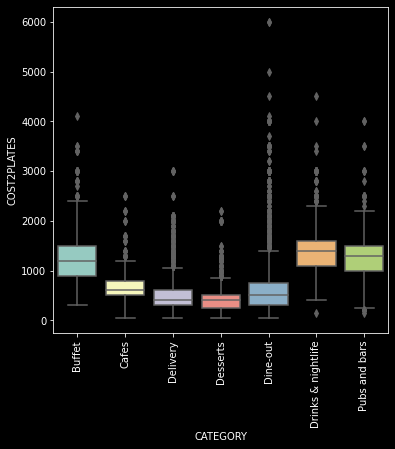

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x='CATEGORY', y='COST2PLATES', data=df)
plt.xticks(rotation=90);


As it can be seen from the chart, restaurants that fall in category of “drinks and nightlife” have the highest average cost. Next in line, is a similar category named “Pubs & Bars” which has nearly similar average cost. While, restaurants that fall in category of “Delivery and Desserts” have the least average cost for their services. Moreover, all category of restaurants have somewhat similar  cost variation.

## Ratings of various category of restaurants

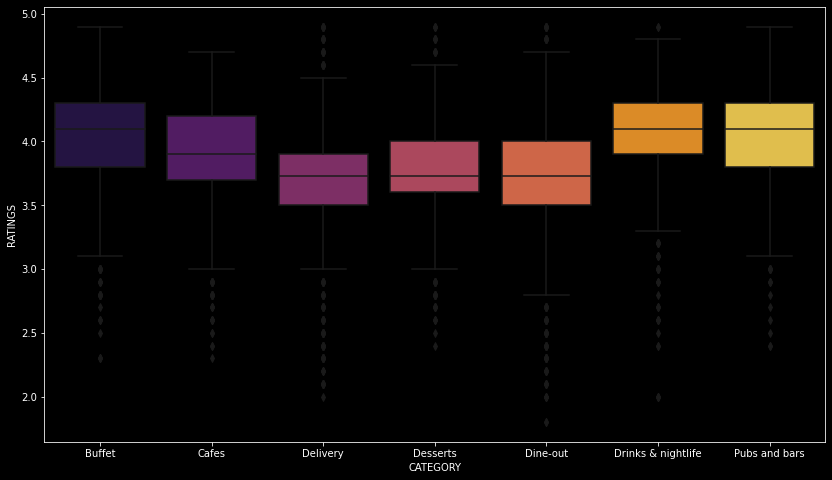

In [38]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'CATEGORY', y = 'RATINGS', data = df, palette = 'inferno');

Surprisingly, restaurant category that have highest average cost are also the one’s most positively rated, they have an average rating of around 4.2. While the restaurants whose average cost is comparatively low are rated moderately with an average rating of around 3.8. People probably vote Pubs, Bars, Drinks, Nightlife restaurant categories more positively because they also get to engage in social conversations, participate in social activities, enjoy and have fun. So, the mood/vibe this restaurant category gives is also a deciding factor behind its high ratings.

## Distribution of Restaurant categories in different locations

In [39]:
df6= df[['LOCATION','CATEGORY']]
df6=pd.crosstab(df6.LOCATION,df6.CATEGORY)
df6

CATEGORY,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
LOCATION,,,,,,,
BTM,15,46,1427,110,872,15,14
Banashankari,5,24,242,46,246,7,0
Banaswadi,0,13,159,19,236,4,1
Bannerghatta Road,8,27,511,92,405,9,2
Basavanagudi,4,8,195,45,208,3,0
Bellandur,28,34,519,72,448,17,16
Brigade Road,13,24,248,55,271,51,22
Brookefield,6,17,299,42,230,4,0
Church Street,19,44,138,21,172,31,21


## Plotting distribution of Restaurant categories in different locations

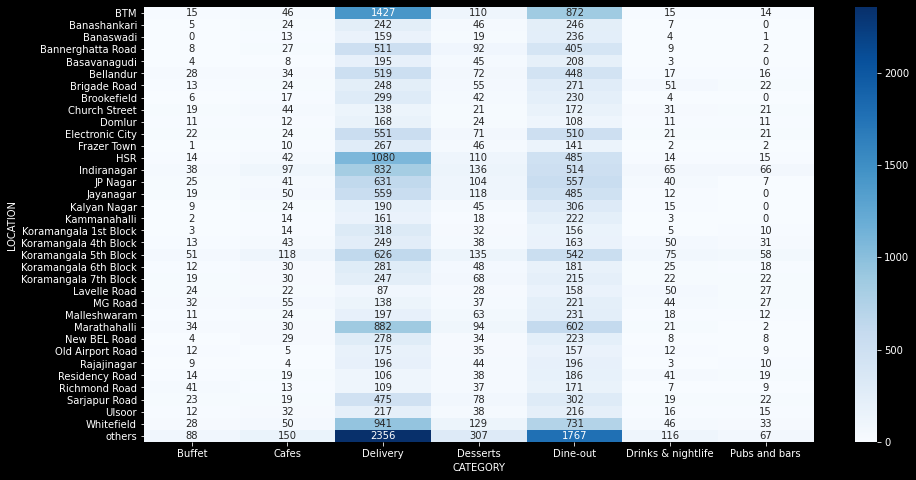

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(df6,cmap='Blues', annot=True, fmt='.4g');

It seems like, majority of restaurants come under Delivery and Dine-out categories  in different locations and as BTM has the highest amount of restaurants, it also has the highest amount of Delivery and Dine-out category  restaurants compared to other locations.

 # SUGGESTIONS
 **I will be giving  recommendations based on the useful insights that we gathered from the  data. The suggestions can be implemented by using our insightful data visualizations as a guidance**.
* Zomato’s business team can target Locations that have least number of restaurants with book table and online order facility .
* Zomato’s marketing team can persuade our new target restaurant owner’s  to use our services for online order facility and Book table facility by letting them know the benefits of it like customer having easier & effective access to their restaurant from home  and  by giving them a evidence based assurance of improving their restaurant ratings after using zomato’s services. 
* Zomato’s business team and our new business client can also make use of feedback data to choose a location where they can get good amount of feedback from the customers as with time feedback is very helpful in improving services that  businesses provides 

* We can recommend our new  business client  to set up his restaurant in places that doesn’t have many restaurants. They can also provide some space within their restaurant where social acitivies can take place.
* Once location is decided, we can recommend our new business client to open that category of restaurant which is present in less numbers in a particular location and that they should also consider standard of living and people’s spending habit on food in that particular location. If our client wants to open a restaurant where standard of living is low, they should choose those  restaurant categories which not only are comparatively cheaper to run but also,the average price per customer can be kept low compared to other categories.
* We can recommend our client what competitive prices for every cuisine depending upon different locations should be kept and which restaurant category and cuisine that generally receives positive ratings from the customer.